In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import *

**Importing the dataset**

In [84]:
df = pd.read_csv('Social_Network_Ads.csv')

In [85]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
#checking for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [60]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)
df = pd.concat([df,Gender],axis=1)

In [61]:
df.drop(['Gender'],axis=1,inplace = True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


**Splitting the dataset into the Training set and Test set**

In [62]:
X = df[['User ID','Age','EstimatedSalary','Male']]
Y = df['Purchased']

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

**Feature Scaling**

In [64]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Fitting SVM to the Training set**

In [65]:
svm = SVC(kernel ="linear",random_state = 0)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [66]:
predicted  = svm.predict(x_test)

**Making the Confusion Matrix**

In [67]:
accuracy_score(y_test,predicted)

0.8333333333333334

In [68]:
confusion_matrix(y_test,predicted)

array([[71,  7],
       [13, 29]], dtype=int64)

**Visualising the Training set results**

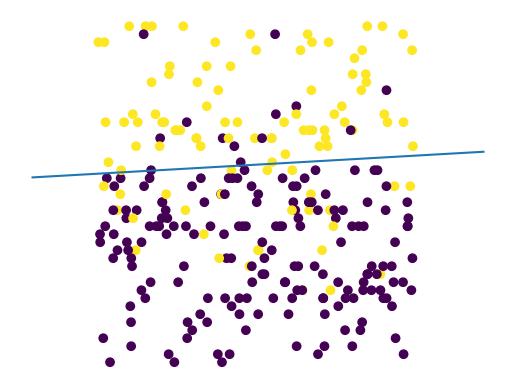

((-2.75, 2.75, -2.060304386377966, 2.3010272356454946), None)

In [69]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

w = svm.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a*xx-(svm.intercept_[0])/w[1]

plt.plot(xx,yy)
plt.axis("off"),plt.show()

**Visualising the Test set results**

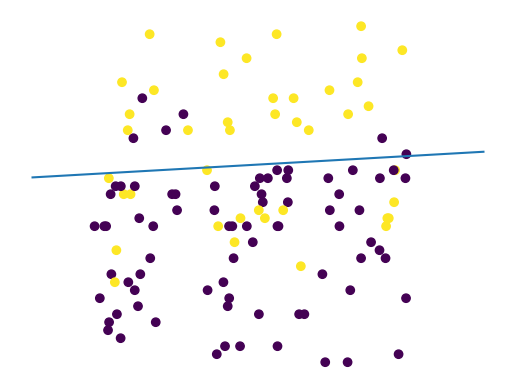

((-2.75, 2.75, -2.060304386377966, 2.3010272356454946), None)

In [70]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

w = svm.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a*xx-(svm.intercept_[0])/w[1]

plt.plot(xx,yy)
plt.axis("off"),plt.show()